<a href="https://colab.research.google.com/github/Zah-dot/myproject/blob/main/sdoh_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/SDOH_Final_Dataset.xlsx')
df.head(10)

,ZIPCODE,ZCTA,STATE,ACS_TOT_POP_WT_ZC,ACS_PCT_CHILD_DISAB_ZC,ACS_PCT_DISABLE_ZC,ACS_PCT_HISPANIC_ZC,ACS_MEDIAN_AGE_ZC,ACS_PCT_FEMALE_ZC,ACS_PCT_MALE_ZC,...,county,Median HPSA Score,Median AQI,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Vaccinated
0,93928,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Monterey,15.0,37.0,18.3,3.455596,4.436613,31.7,8.2,24.9,50
1,95836,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sacramento,9.0,34.0,14.5,3.263923,4.815922,30.7,8.0,21.2,46
2,91023,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
3,93581,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kern,14.0,52.0,21.2,3.964160,5.003990,35.0,7.1,28.1,40
4,93530,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Inyo,11.0,58.0,13.8,3.257547,5.076591,29.7,7.8,19.0,37
5,92158,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,San Diego,0.0,46.0,13.4,3.021765,4.451347,28.4,8.5,20.3,46
6,93246,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kings,10.0,NaN,20.1,3.888632,4.806345,35.1,7.6,27.6,39
7,90099,90001.0,California,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
8,90060,90001.0,California,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
9,90054,90001.0,California,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,...,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43


In [ ]:
print(df.isnull().sum())

ZIPCODE                                          0
ZCTA                                             7
STATE                                            0
ACS_TOT_POP_WT_ZC                                7
ACS_PCT_CHILD_DISAB_ZC                         119
ACS_PCT_DISABLE_ZC                              42
ACS_PCT_HISPANIC_ZC                             33
ACS_MEDIAN_AGE_ZC                               49
ACS_PCT_FEMALE_ZC                               33
ACS_PCT_MALE_ZC                                 33
ACS_PCT_ENGL_NOT_WELL_ZC                        33
county                                           1
Median HPSA Score                                1
Median AQI                                     154
% Fair or Poor Health                            0
Average Number of Physically Unhealthy Days      0
Average Number of Mentally Unhealthy Days        0
% Adults with Obesity                            0
Food Environment Index                           0
% Physically Inactive          

<Axes: >

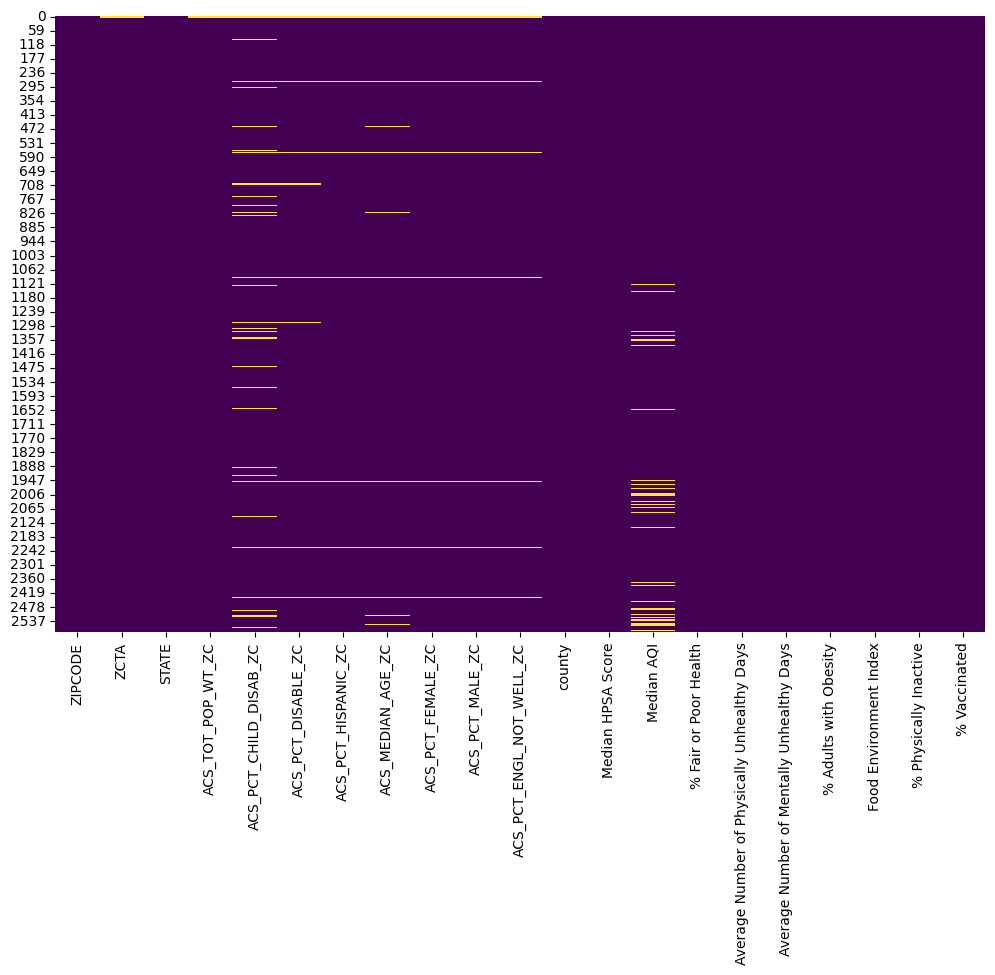

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [ ]:
df.describe()

,ZIPCODE,ZCTA,ACS_TOT_POP_WT_ZC,ACS_PCT_CHILD_DISAB_ZC,ACS_PCT_DISABLE_ZC,ACS_PCT_HISPANIC_ZC,ACS_MEDIAN_AGE_ZC,ACS_PCT_FEMALE_ZC,ACS_PCT_MALE_ZC,ACS_PCT_ENGL_NOT_WELL_ZC,Median HPSA Score,Median AQI,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Vaccinated
count,2585.000000,2578.000000,2578.000000,2466.000000,2543.000000,2552.000000,2536.000000,2552.000000,2552.000000,2552.000000,2584.000000,2431.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.00000
mean,93472.563636,93502.135376,27093.678433,3.559546,12.506465,31.859193,40.193849,49.279949,50.720063,4.867672,8.430534,46.447141,15.104990,3.227852,4.678314,29.404023,8.123443,21.433578,45.05648
std,1792.517535,1825.187593,23241.920386,4.417870,6.922351,23.989631,9.156933,6.654993,6.654997,4.632462,5.473718,11.135140,3.046054,0.419772,0.318268,4.562157,0.639060,3.286067,6.44024
min,90001.000000,90001.000000,0.000000,0.000000,0.000000,0.000000,15.900000,0.000000,0.000000,0.000000,0.000000,15.000000,9.500000,2.450219,3.972747,19.000000,6.000000,14.100000,19.00000
25%,92117.000000,92108.000000,4639.750000,1.610000,8.865000,13.362500,34.200000,48.457500,48.260000,1.365000,3.000000,37.000000,13.000000,3.007288,4.451347,28.100000,7.800000,19.400000,43.00000
50%,93543.000000,93536.000000,25449.500000,2.970000,10.910000,24.460000,38.250000,50.300000,49.700000,3.590000,12.000000,46.000000,15.600000,3.114880,4.643930,28.800000,8.100000,21.200000,46.00000
75%,95159.000000,95250.500000,41534.000000,4.560000,14.480000,46.810000,44.600000,51.740000,51.542500,7.202500,12.000000,59.000000,16.500000,3.516812,4.872720,31.700000,8.600000,21.600000,50.00000
max,96162.000000,96161.000000,110750.000000,100.000000,100.000000,100.000000,79.500000,100.000000,100.000000,44.500000,16.000000,67.000000,24.000000,4.161616,5.510197,39.100000,9.300000,31.700000,55.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ZIPCODE                                      2585 non-null   int64  
 1   ZCTA                                         2578 non-null   float64
 2   STATE                                        2585 non-null   object 
 3   ACS_TOT_POP_WT_ZC                            2578 non-null   float64
 4   ACS_PCT_CHILD_DISAB_ZC                       2466 non-null   float64
 5   ACS_PCT_DISABLE_ZC                           2543 non-null   float64
 6   ACS_PCT_HISPANIC_ZC                          2552 non-null   float64
 7   ACS_MEDIAN_AGE_ZC                            2536 non-null   float64
 8   ACS_PCT_FEMALE_ZC                            2552 non-null   float64
 9   ACS_PCT_MALE_ZC                              2552 non-null   float64
 10  

In [ ]:
df1 = df.drop(['ZIPCODE','ZCTA','STATE','ACS_TOT_POP_WT_ZC'], axis=1)

## Handling Missing Values

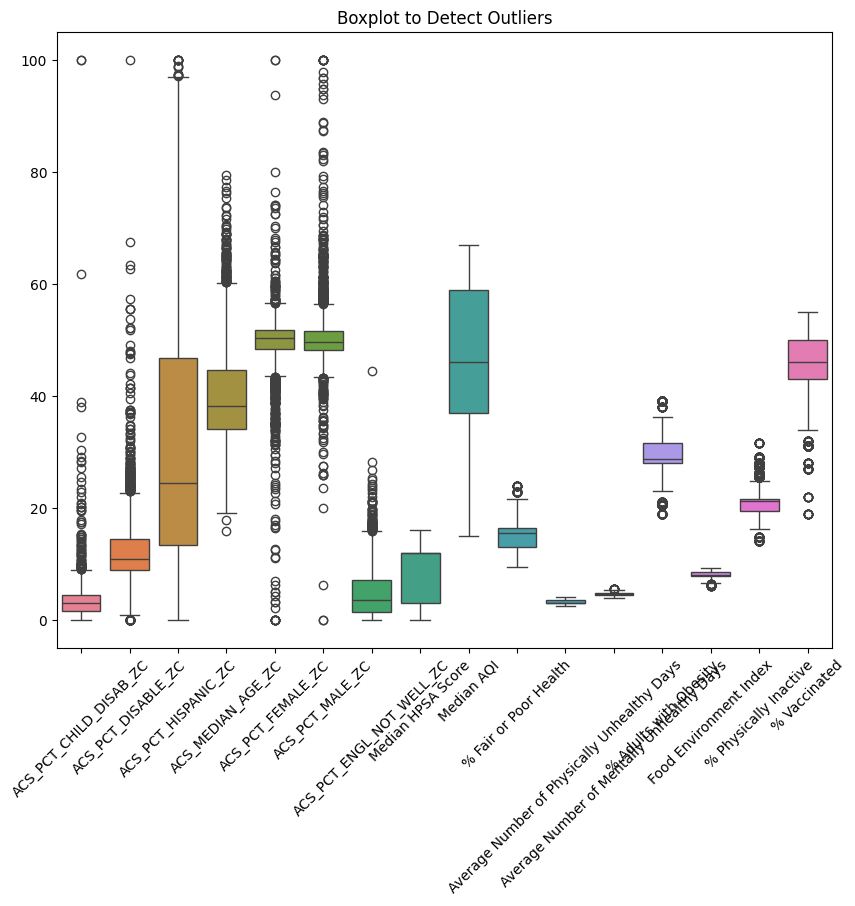

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1)
plt.title('Boxplot to Detect Outliers')
plt.xticks(rotation=45)
plt.show()

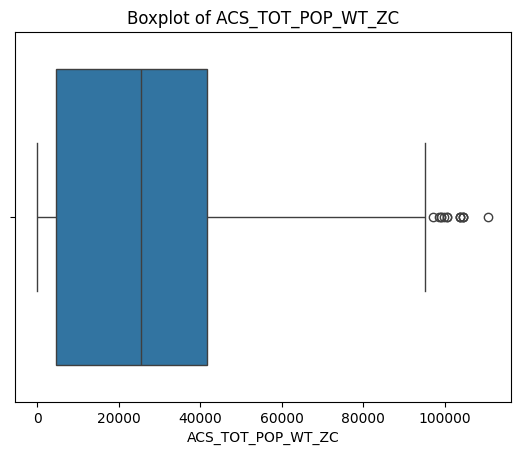

In [ ]:
sns.boxplot(data=df, x='ACS_TOT_POP_WT_ZC')
plt.title('Boxplot of ACS_TOT_POP_WT_ZC')
plt.show()

In [ ]:
df2 = df.drop(['ZCTA','STATE'], axis=1)
df2.head(10)

,ZIPCODE,ACS_TOT_POP_WT_ZC,ACS_PCT_CHILD_DISAB_ZC,ACS_PCT_DISABLE_ZC,ACS_PCT_HISPANIC_ZC,ACS_MEDIAN_AGE_ZC,ACS_PCT_FEMALE_ZC,ACS_PCT_MALE_ZC,ACS_PCT_ENGL_NOT_WELL_ZC,county,Median HPSA Score,Median AQI,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Vaccinated
0,93928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monterey,15.0,37.0,18.3,3.455596,4.436613,31.7,8.2,24.9,50
1,95836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sacramento,9.0,34.0,14.5,3.263923,4.815922,30.7,8.0,21.2,46
2,91023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
3,93581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kern,14.0,52.0,21.2,3.964160,5.003990,35.0,7.1,28.1,40
4,93530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inyo,11.0,58.0,13.8,3.257547,5.076591,29.7,7.8,19.0,37
5,92158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,0.0,46.0,13.4,3.021765,4.451347,28.4,8.5,20.3,46
6,93246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kings,10.0,NaN,20.1,3.888632,4.806345,35.1,7.6,27.6,39
7,90099,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,15.46,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
8,90060,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,15.46,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
9,90054,58974.0,1.89,8.3,89.87,30.3,49.13,50.87,15.46,Los Angeles,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43


In [ ]:
df2['ACS_TOT_POP_WT_ZC'].median()

25449.5

In [ ]:
df2['ACS_TOT_POP_WT_ZC']=df['ACS_TOT_POP_WT_ZC'].fillna(df['ACS_TOT_POP_WT_ZC'].median())

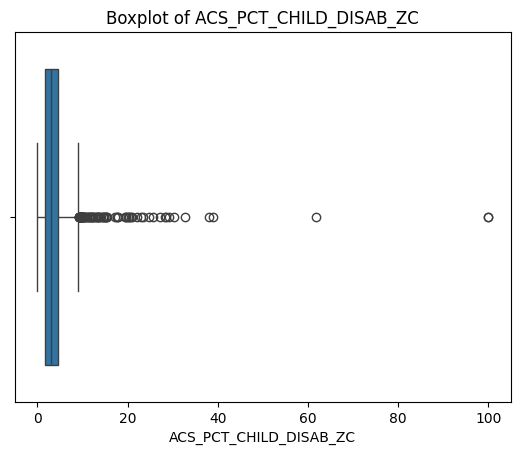

In [ ]:
sns.boxplot(data=df, x='ACS_PCT_CHILD_DISAB_ZC')
plt.title('Boxplot of ACS_PCT_CHILD_DISAB_ZC')
plt.show()

In [ ]:
df2['ACS_PCT_CHILD_DISAB_ZC'].median()

2.97

In [ ]:
df2['ACS_PCT_CHILD_DISAB_ZC']=df2['ACS_PCT_CHILD_DISAB_ZC'].fillna(df2['ACS_PCT_CHILD_DISAB_ZC'].median())

Text(0.5, 1.0, 'Boxplot of ACS_PCT_DISABLE_ZC')

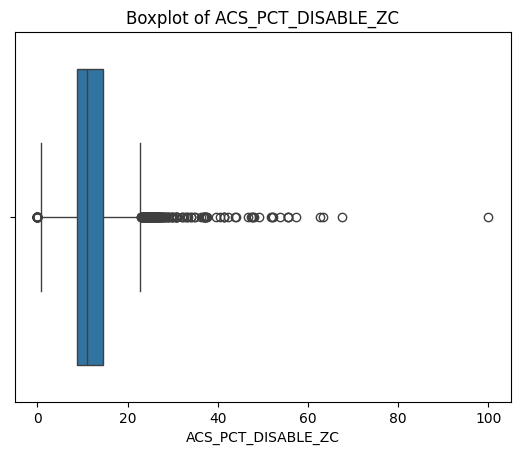

In [ ]:
sns.boxplot(data=df, x='ACS_PCT_DISABLE_ZC')
plt.title('Boxplot of ACS_PCT_DISABLE_ZC')

In [ ]:
df2['ACS_PCT_DISABLE_ZC']=df2['ACS_PCT_DISABLE_ZC'].fillna(df2['ACS_PCT_DISABLE_ZC'].median())
df2['ACS_PCT_HISPANIC_ZC']=df2['ACS_PCT_HISPANIC_ZC'].fillna(df2['ACS_PCT_HISPANIC_ZC'].median())
df2['ACS_MEDIAN_AGE_ZC']=df2['ACS_MEDIAN_AGE_ZC'].fillna(df2['ACS_MEDIAN_AGE_ZC'].median())
df2['ACS_PCT_FEMALE_ZC']=df2['ACS_PCT_FEMALE_ZC'].fillna(df2['ACS_PCT_FEMALE_ZC'].median())
df2['ACS_PCT_MALE_ZC']=df2['ACS_PCT_MALE_ZC'].fillna(df2['ACS_PCT_MALE_ZC'].median())
df2['ACS_PCT_ENGL_NOT_WELL_ZC']=df2['ACS_PCT_ENGL_NOT_WELL_ZC'].fillna(df2['ACS_PCT_ENGL_NOT_WELL_ZC'].median())

<Axes: xlabel='Median AQI'>

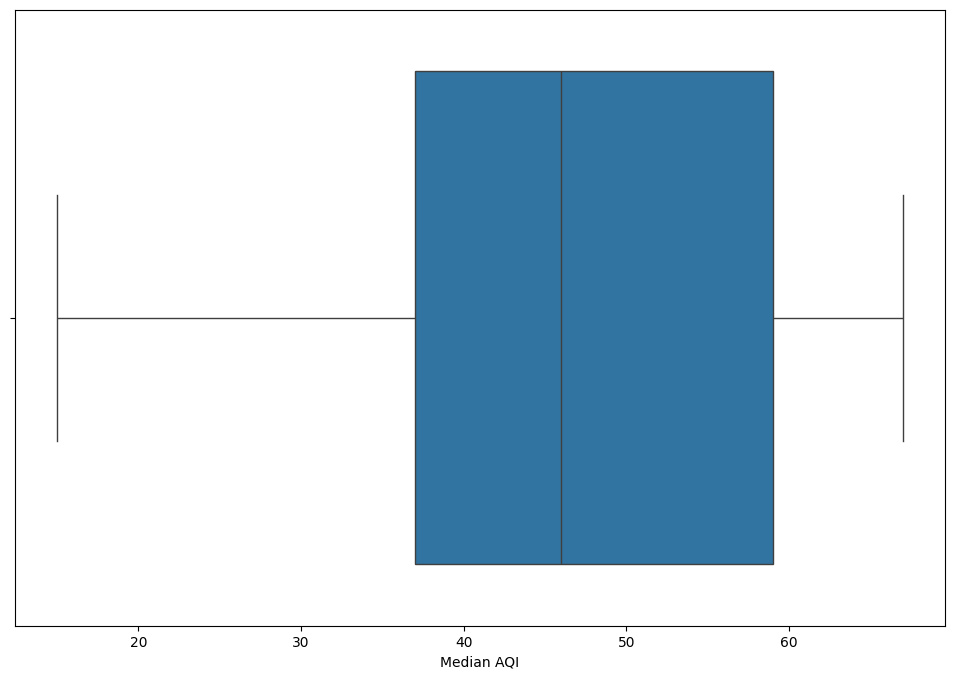

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2,x='Median AQI')

## Observation

Since Median AQI has no outliers, we can use Mean to fill the null values

In [ ]:
df2['Median AQI']=df2['Median AQI'].fillna(df2['Median AQI'].mean())

In [ ]:
df2['Median HPSA Score']=df2['Median HPSA Score'].fillna(df2['Median HPSA Score'].mean())

In [ ]:
df2.isnull().sum()

,0
ZIPCODE,0
ACS_TOT_POP_WT_ZC,0
ACS_PCT_CHILD_DISAB_ZC,0
ACS_PCT_DISABLE_ZC,0
ACS_PCT_HISPANIC_ZC,0
ACS_MEDIAN_AGE_ZC,0
ACS_PCT_FEMALE_ZC,0
ACS_PCT_MALE_ZC,0
ACS_PCT_ENGL_NOT_WELL_ZC,0
county,1


<Axes: >

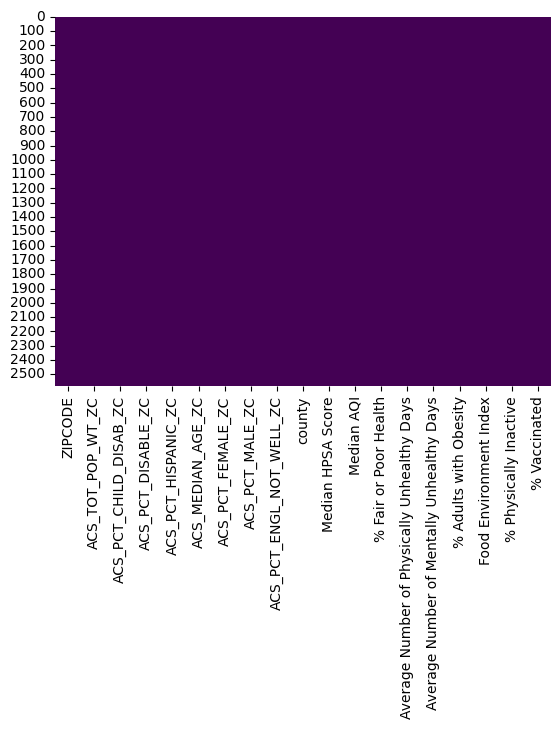

In [ ]:
sns.heatmap(df2.isnull(), cmap='viridis', cbar=False)   #all missing values have been handled

## Handling Categorical Feature "County"

In [ ]:
df2.drop(['county'],axis=1,inplace=True)

In [ ]:
df2.head()

,ZIPCODE,ACS_TOT_POP_WT_ZC,ACS_PCT_CHILD_DISAB_ZC,ACS_PCT_DISABLE_ZC,ACS_PCT_HISPANIC_ZC,ACS_MEDIAN_AGE_ZC,ACS_PCT_FEMALE_ZC,ACS_PCT_MALE_ZC,ACS_PCT_ENGL_NOT_WELL_ZC,Median HPSA Score,Median AQI,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Vaccinated
0,93928,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,15.0,37.0,18.3,3.455596,4.436613,31.7,8.2,24.9,50
1,95836,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,9.0,34.0,14.5,3.263923,4.815922,30.7,8.0,21.2,46
2,91023,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,12.0,59.0,15.8,3.114880,4.643930,28.8,8.1,21.6,43
3,93581,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,14.0,52.0,21.2,3.964160,5.003990,35.0,7.1,28.1,40
4,93530,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,11.0,58.0,13.8,3.257547,5.076591,29.7,7.8,19.0,37


## Correlation Matrix

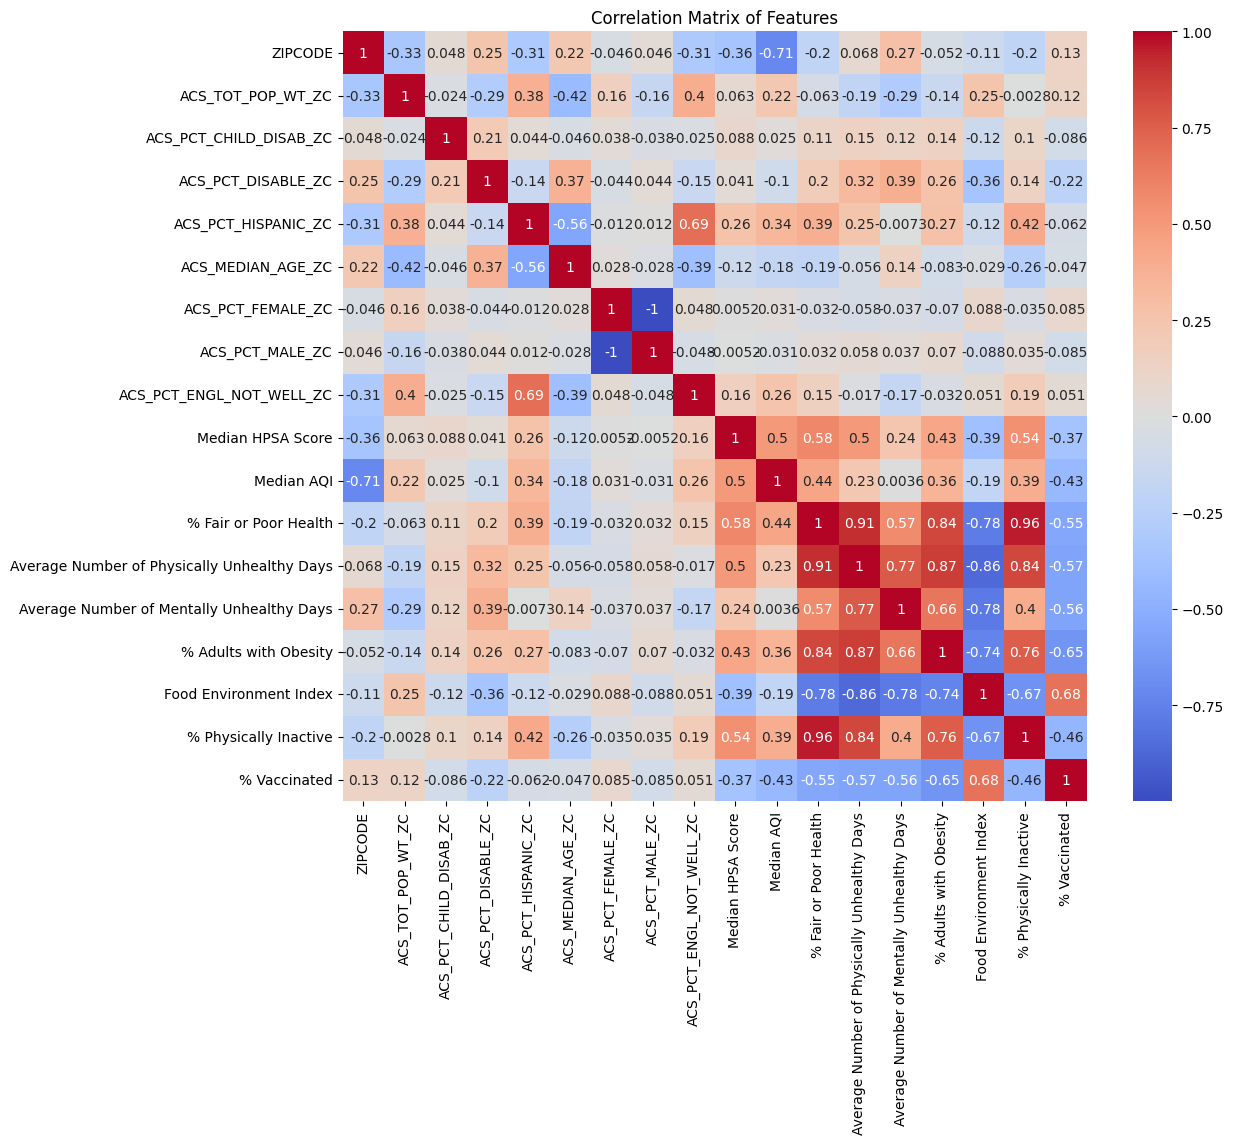

In [ ]:
corr_matrix = df2.corr()
## Default method for correlation is Pearson
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Correlation Matrix (Spearman)

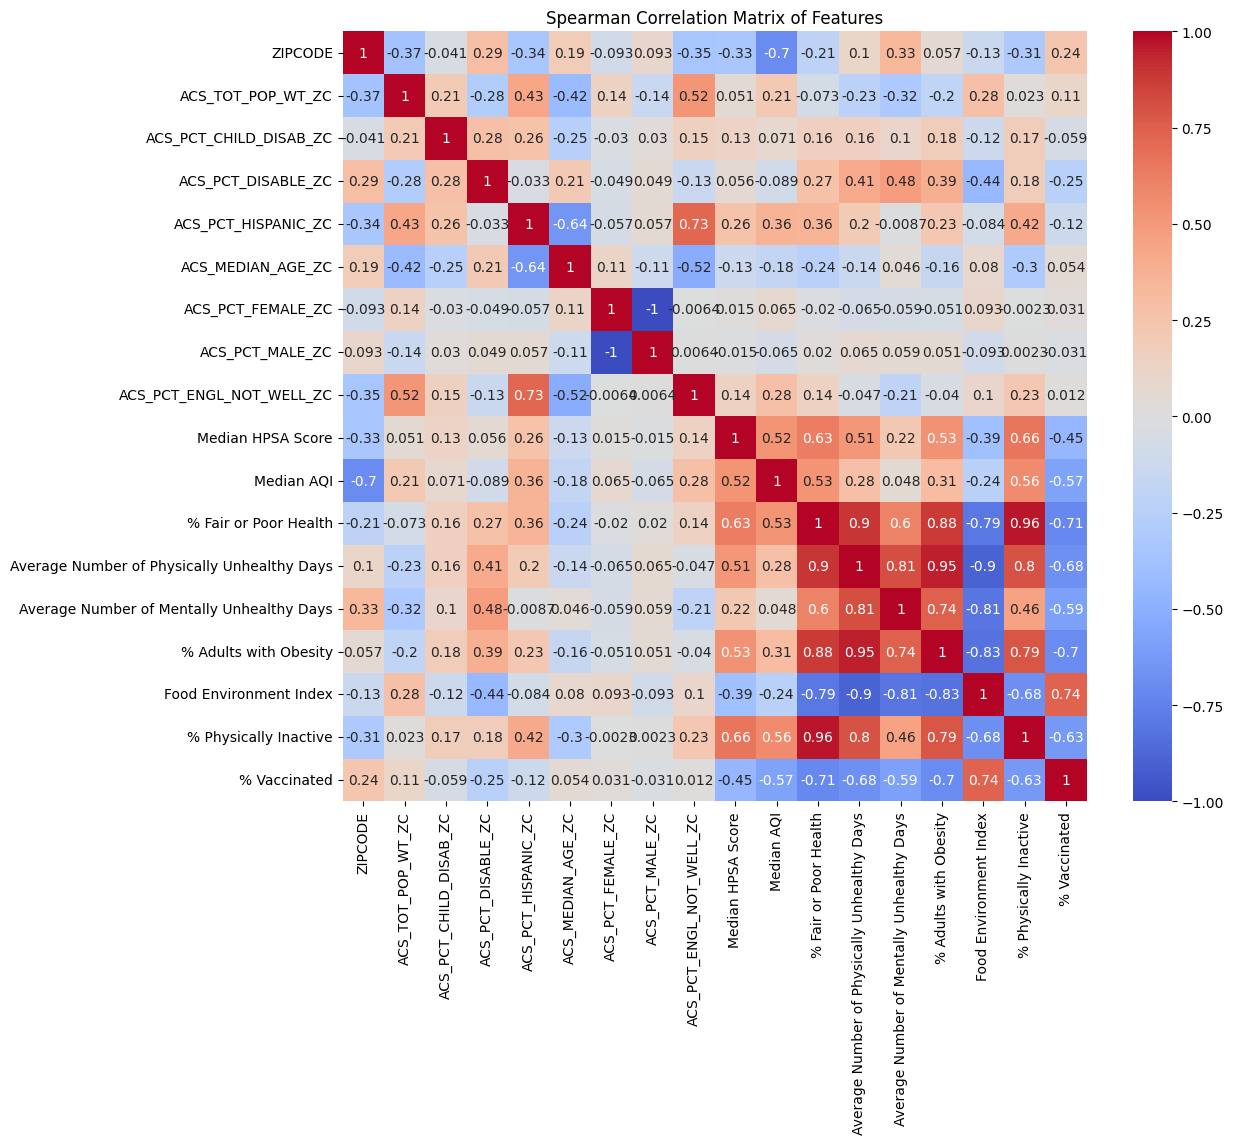

In [ ]:
corr_matrix = df2.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix of Features')
plt.show()

## Standardization And PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df3=df2.drop(['% Fair or Poor Health'],axis=1)  ##preparing for PCA, df3 does not have the target feature

In [ ]:
df3.isnull().sum()

,0
ZIPCODE,0
ACS_TOT_POP_WT_ZC,0
ACS_PCT_CHILD_DISAB_ZC,0
ACS_PCT_DISABLE_ZC,0
ACS_PCT_HISPANIC_ZC,0
ACS_MEDIAN_AGE_ZC,0
ACS_PCT_FEMALE_ZC,0
ACS_PCT_MALE_ZC,0
ACS_PCT_ENGL_NOT_WELL_ZC,0
Median HPSA Score,0


In [ ]:
df3.head()

,ZIPCODE,ACS_TOT_POP_WT_ZC,ACS_PCT_CHILD_DISAB_ZC,ACS_PCT_DISABLE_ZC,ACS_PCT_HISPANIC_ZC,ACS_MEDIAN_AGE_ZC,ACS_PCT_FEMALE_ZC,ACS_PCT_MALE_ZC,ACS_PCT_ENGL_NOT_WELL_ZC,Median HPSA Score,Median AQI,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Vaccinated
0,93928,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,15.0,37.0,3.455596,4.436613,31.7,8.2,24.9,50
1,95836,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,9.0,34.0,3.263923,4.815922,30.7,8.0,21.2,46
2,91023,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,12.0,59.0,3.114880,4.643930,28.8,8.1,21.6,43
3,93581,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,14.0,52.0,3.964160,5.003990,35.0,7.1,28.1,40
4,93530,25449.5,2.97,10.91,24.46,38.25,50.3,49.7,3.59,11.0,58.0,3.257547,5.076591,29.7,7.8,19.0,37


In [ ]:
sc=StandardScaler()
sc.fit(df3)

StandardScaler()

In [ ]:
scaled_data=sc.transform(df3)

In [ ]:
scaled_data

array([[ 0.25412554, -0.07065932, -0.13031096, ...,  0.11981955,
         1.05508871,  0.76774734],
       [ 1.31875622, -0.07065932, -0.13031096, ..., -0.1932007 ,
        -0.07109518,  0.14653226],
       [-1.36681373, -0.07065932, -0.13031096, ..., -0.03669057,
         0.05065443, -0.31937905],
       ...,
       [ 1.49396273,  0.14133249, -0.18591958, ...,  0.4328398 ,
        -1.37990347,  0.92305111],
       [ 1.50010054, -0.35797619, -0.19287066, ..., -0.50622095,
        -1.59296529,  0.61244357],
       [ 1.49954256, -0.35797619, -0.19287066, ..., -0.50622095,
        -1.59296529,  0.61244357]])

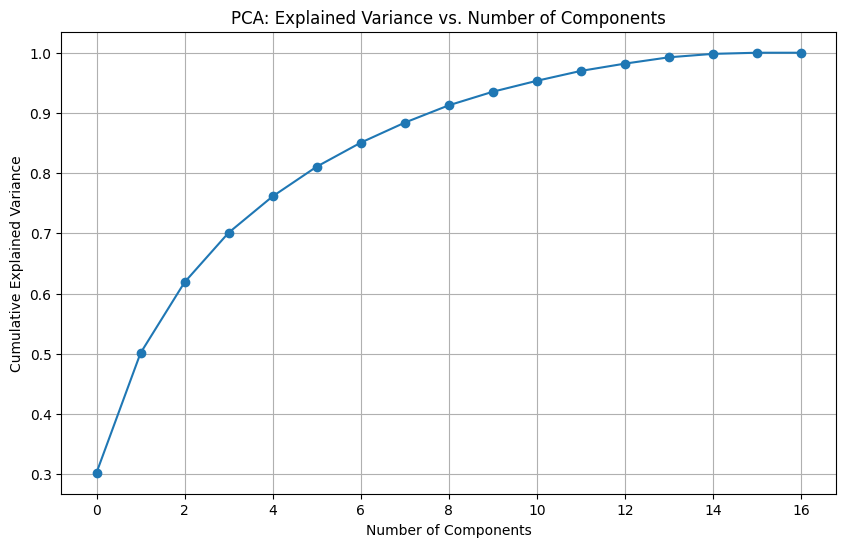

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)


plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=12)
pca.fit(scaled_data)

PCA(n_components=12)

In [ ]:
x_pca = pca.transform(scaled_data)


In [ ]:
print(x_pca.shape)

(2585, 12)


In [ ]:
scaled_data.shape

(2585, 17)

In [ ]:
x_pca

array([[ 0.3091421 ,  0.06174688,  0.1932616 , ...,  0.1484152 ,
        -0.67698741, -0.02224703],
       [-0.06722313, -1.05809108,  0.2670907 , ..., -0.12799269,
        -0.20361922,  0.2186501 ],
       [ 0.30891665,  0.94216071,  0.17199207, ..., -0.42198155,
         0.32869274, -0.34212521],
       ...,
       [-1.60834959, -1.26389443, -0.27170189, ..., -0.53740597,
         0.31953569,  0.63315652],
       [-1.35731787, -1.94330247,  0.11406239, ...,  0.03631051,
         0.51900852,  0.00933812],
       [-1.3572899 , -1.94309186,  0.11404987, ...,  0.03634521,
         0.51919449,  0.00909757]])

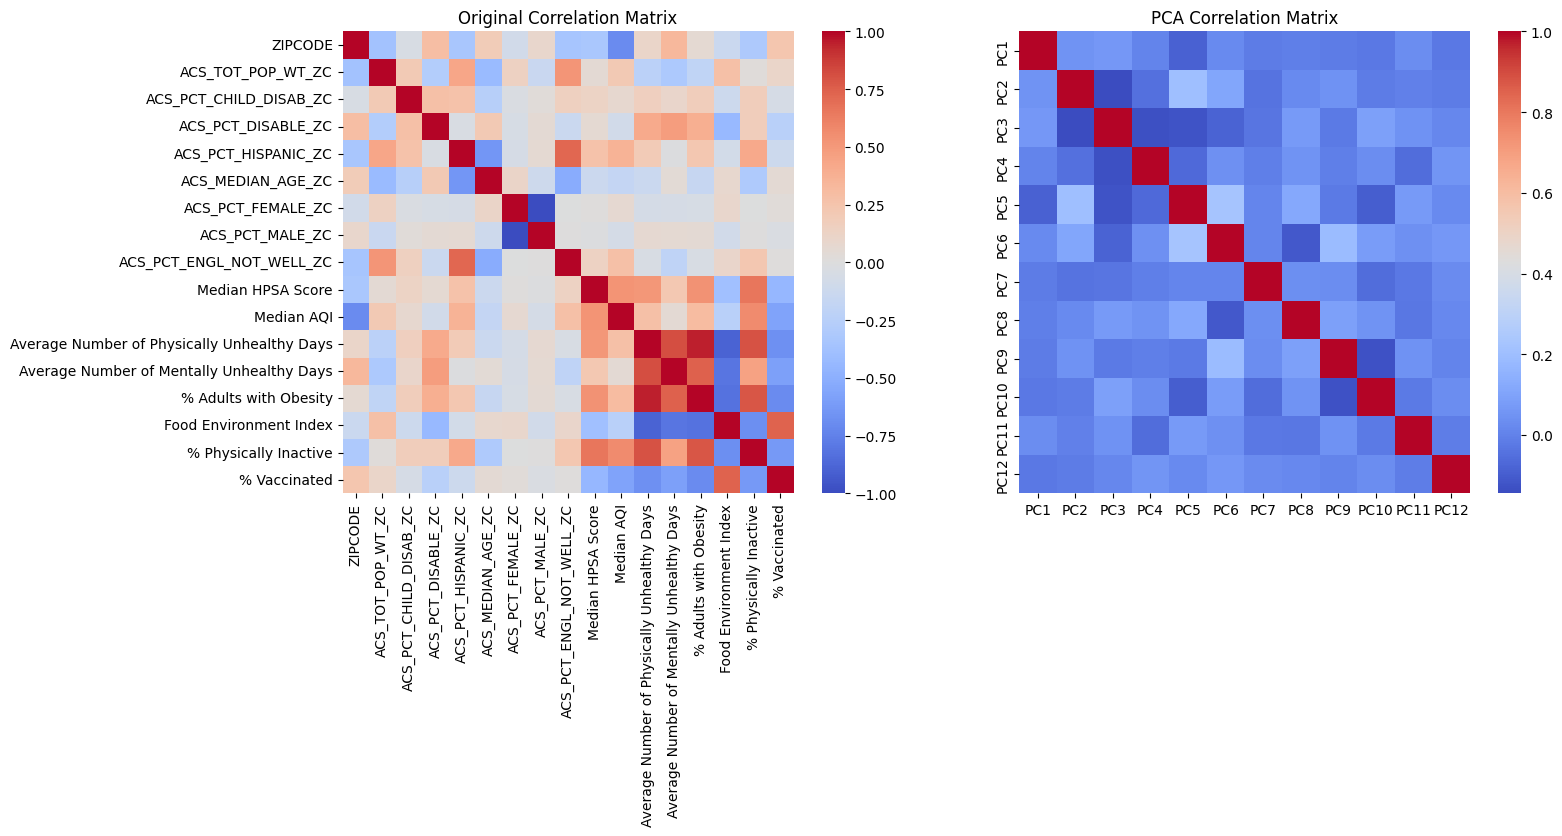

In [ ]:
corr_org = df3.corr(method='spearman')

pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])
corr_pca=pca_df.corr(method='spearman')


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_org, ax=ax[0], cmap='coolwarm', annot=False)
ax[0].set_title('Original Correlation Matrix')

sns.heatmap(corr_pca, ax=ax[1], cmap='coolwarm', annot=False)
ax[1].set_title('PCA Correlation Matrix')

plt.show()

In [ ]:
pca_df['% Fair or Poor Health']=df['% Fair or Poor Health']

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,% Fair or Poor Health
0,0.309142,0.061747,0.193262,0.354848,-0.361532,-0.572552,1.711138,0.988245,-0.215547,0.148415,-0.676987,-0.022247,18.3
1,-0.067223,-1.058091,0.267091,1.143878,-0.633831,-0.474955,0.163708,0.385471,0.472983,-0.127993,-0.203619,0.218650,14.5
2,0.308917,0.942161,0.171992,-1.624731,0.060630,-0.288953,0.049530,-0.106431,-0.084237,-0.421982,0.328693,-0.342125,15.8
3,3.448284,-0.146444,0.446105,-0.061796,-0.872100,-0.707759,0.471665,0.436487,-0.102925,0.366014,-0.396079,-0.569072,21.2
4,1.030661,-0.185425,0.337185,-0.872846,-0.339154,-0.332347,-1.083996,-0.290550,0.975369,-0.757124,0.596650,0.213426,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,-1.608406,-1.264316,-0.271677,1.030514,-0.095608,0.011461,0.292896,0.994225,0.924054,-0.537475,0.319164,0.633638,11.6
2581,-1.608378,-1.264105,-0.271689,1.030246,-0.095547,0.011484,0.292894,0.994169,0.923929,-0.537441,0.319350,0.633397,11.6
2582,-1.608350,-1.263894,-0.271702,1.029978,-0.095485,0.011507,0.292892,0.994113,0.923804,-0.537406,0.319536,0.633157,11.6
2583,-1.357318,-1.943302,0.114062,0.885535,-0.853802,-0.660619,-0.264621,-0.004494,1.180476,0.036311,0.519009,0.009338,11.5


## Random Forest Model

In [ ]:
X=pca_df.drop('% Fair or Poor Health',axis=1)
y=pca_df['% Fair or Poor Health']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)  ## Making the prediction

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.12442712379110285


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.12968858800774447


In [ ]:
parameter = {
    'n_estimators': [10, 100],
    'max_depth': [None, 10],
    'criterion':['squared_error','absolute_error']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

regressor=GridSearchCV(rf,param_grid=parameter,cv=5,scoring='r2')  ## cross validation

In [ ]:
regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10], 'n_estimators': [10, 100]},
             scoring='r2')

In [ ]:
regressor.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 100}

In [ ]:
y_pred_CV_train=regressor.predict(X_train)

In [ ]:
y_pred_CV=regressor.predict(X_test)  ## On Test Data

In [ ]:
from sklearn.metrics import r2_score    # R2 Score for Test Data
r2_score(y_pred_CV,y_test)

0.9867333272470208

In [ ]:
from sklearn.metrics import r2_score   # R2 score for Train Data
r2_score(y_pred_CV_train,y_train)

0.9972353459129774

# XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import xgboost as xgb

print(pca_df.head())
print(pca_df.dtypes)

target_column = '% Fair or Poor Health'

if target_column not in pca_df.columns:
    raise ValueError(f"Target column '{target_column}' not found in pca_df. Check column names.")

X = pca_df.drop(columns=[target_column])
y = pca_df[target_column]

y = pd.to_numeric(y, errors='coerce')


X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=3
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

print("Best Parameters:", best_params)



        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.309142  0.061747  0.193262  0.354848 -0.361532 -0.572552  1.711138   
1 -0.067223 -1.058091  0.267091  1.143878 -0.633831 -0.474955  0.163708   
2  0.308917  0.942161  0.171992 -1.624731  0.060630 -0.288953  0.049530   
3  3.448284 -0.146444  0.446105 -0.061796 -0.872100 -0.707759  0.471665   
4  1.030661 -0.185425  0.337185 -0.872846 -0.339154 -0.332347 -1.083996   

        PC8       PC9      PC10      PC11      PC12  % Fair or Poor Health  
0  0.988245 -0.215547  0.148415 -0.676987 -0.022247                   18.3  
1  0.385471  0.472983 -0.127993 -0.203619  0.218650                   14.5  
2 -0.106431 -0.084237 -0.421982  0.328693 -0.342125                   15.8  
3  0.436487 -0.102925  0.366014 -0.396079 -0.569072                   21.2  
4 -0.290550  0.975369 -0.757124  0.596650  0.213426                   13.8  
PC1                      float64
PC2                      float64
PC3                  

In [ ]:
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Best XGBoost R² Score on Training Data:", r2_train)
print("Best XGBoost R² Score on Test Data:", r2_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(" Mean Squared Error on Training Data:", mse_train)
print(" Mean Squared Error on Test Data:", mse_test)


NameError: name 'y_train' is not defined

## SVM

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
X=pca_df.drop('% Fair or Poor Health',axis=1)
y=pca_df['% Fair or Poor Health']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

svm_regressor = SVR(**best_params)
svm_regressor.fit(X_train, y_train)

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}


SVR(C=10, epsilon=0.01)

In [ ]:
y_train_pred = svm_regressor.predict(X_train)
y_test_pred = svm_regressor.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("R² Score on Training Data:", r2_train)
print("R² Score on Test Data:", r2_test)
print("Mean Absolute Error on Test Data:", mae_test)
print("Mean Squared Error on Test Data:", mse_test)

R² Score on Training Data: 0.9995690758474427
R² Score on Test Data: 0.986867746149704
Mean Absolute Error on Test Data: 0.10955528387445758
Mean Squared Error on Test Data: 0.12160592743218551


In [ ]:
cv_scores = cross_val_score(svm_regressor, X, y, cv=5, scoring='r2')
print("Mean Cross-Validation R² Score:", np.mean(cv_scores))

Mean Cross-Validation R² Score: 0.8995292720364103


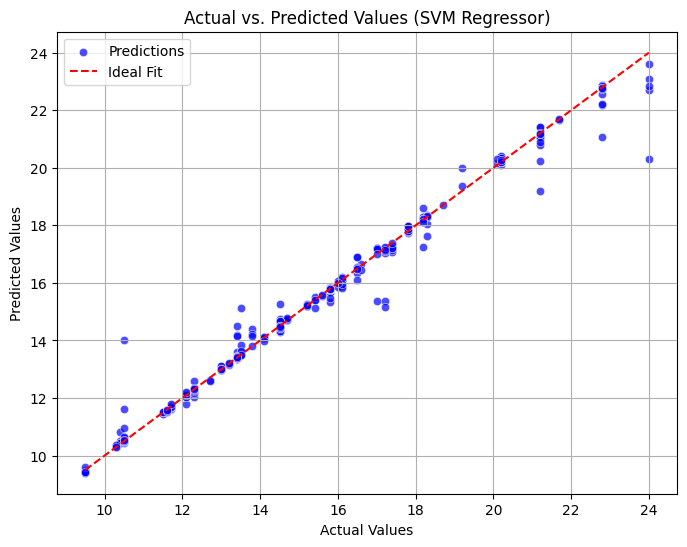

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, color='blue', label='Predictions')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label='Ideal Fit')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (SVM Regressor)")
plt.legend()
plt.grid(True)

plt.show()